# Как быстро что-то сделать ничего не зная (ну типа йоу yolo)?
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Сначала проверь GPU

`Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat May 18 12:06:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Прост сделаем домашнюю директорию

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

Yolov9 новая, свежая, много багов, но мы постараемся

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 26.61 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.3 MB/s eta 0:00:00


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [ ]:
!pip install -q roboflow

## Скачать веса модели

### YOLOv9 Модели

1. **`yolov9-c.pt`**:
   - Это базовая модель YOLOv9, ориентированная на скорость и производительность. Она предназначена для детекции объектов и обладает хорошим балансом между точностью и скоростью выполнения.
   
2. **`yolov9-e.pt`**:
   - Это улучшенная версия модели YOLOv9, предназначенная для обеспечения более высокой точности при обработке изображений. Она может использовать больше ресурсов и занимать больше времени на выполнение задач, чем модель `yolov9-c.pt`, но при этом предлагает улучшенную точность.

### Gelan Модели

1. **`gelan-c.pt`**:
   - Это базовая модель Gelan, которая также сфокусирована на скорости и эффективности выполнения. Она является аналогом модели `yolov9-c.pt`, но с некоторыми особенностями и улучшениями, специфичными для архитектуры Gelan.
   
2. **`gelan-e.pt`**:
   - Это расширенная версия модели Gelan, предназначенная для задач, требующих высокой точности. Она аналогична модели `yolov9-e.pt`, но использует архитектуру Gelan для достижения лучших результатов в детекции объектов.

### Отличия моделей

- **Точность и производительность**: Модели с индексом "e" (`yolov9-e.pt` и `gelan-e.pt`) предлагают лучшую точность, но могут требовать больше вычислительных ресурсов. Модели с индексом "c" (`yolov9-c.pt` и `gelan-c.pt`) сбалансированы для обеспечения скорости и производительности.
- **Архитектура**: YOLOv9 и Gelan имеют разные архитектуры, что влияет на их поведение при детекции объектов. Gelan может включать дополнительные улучшения и специфические оптимизации, отличающиеся от YOLOv9.


1. https://github.com/WongKinYiu/yolov9

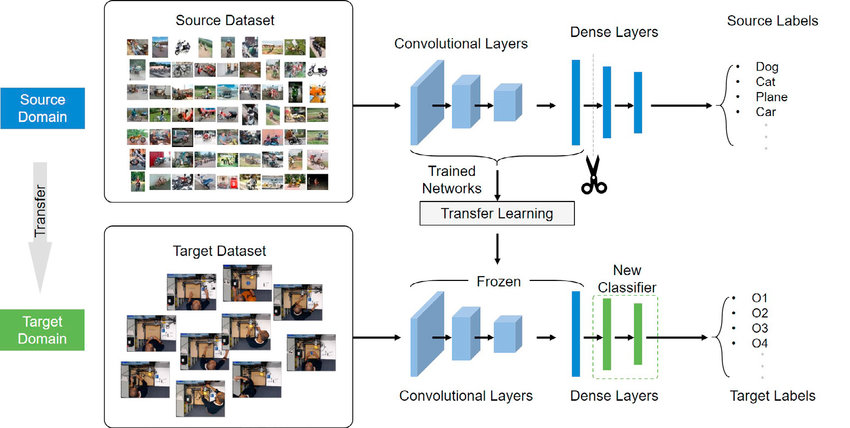

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 804888
drwxr-xr-x 2 root root      4096 May 17 08:57 .
drwxr-xr-x 1 root root      4096 May 17 06:51 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


## Download example data

Скачаем датасет с roboflow и посмотрим как он

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights /content/weights/gelan-c.pt --source /content/data/dog.jpeg --imgsz 640 --conf 0.1 --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 133.6ms
Speed: 0.5ms pre-process, 133.6ms inference, 552.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**ПРИМЕЧАНИЕ:** По умолчанию, результаты каждой последующей сессии вывода сохраняются в `{HOME}/yolov9/runs/detect/`, в директориях с названиями `exp`, `exp2`, `exp3` и т.д. Вы можете изменить это поведение, используя параметр `--name`.

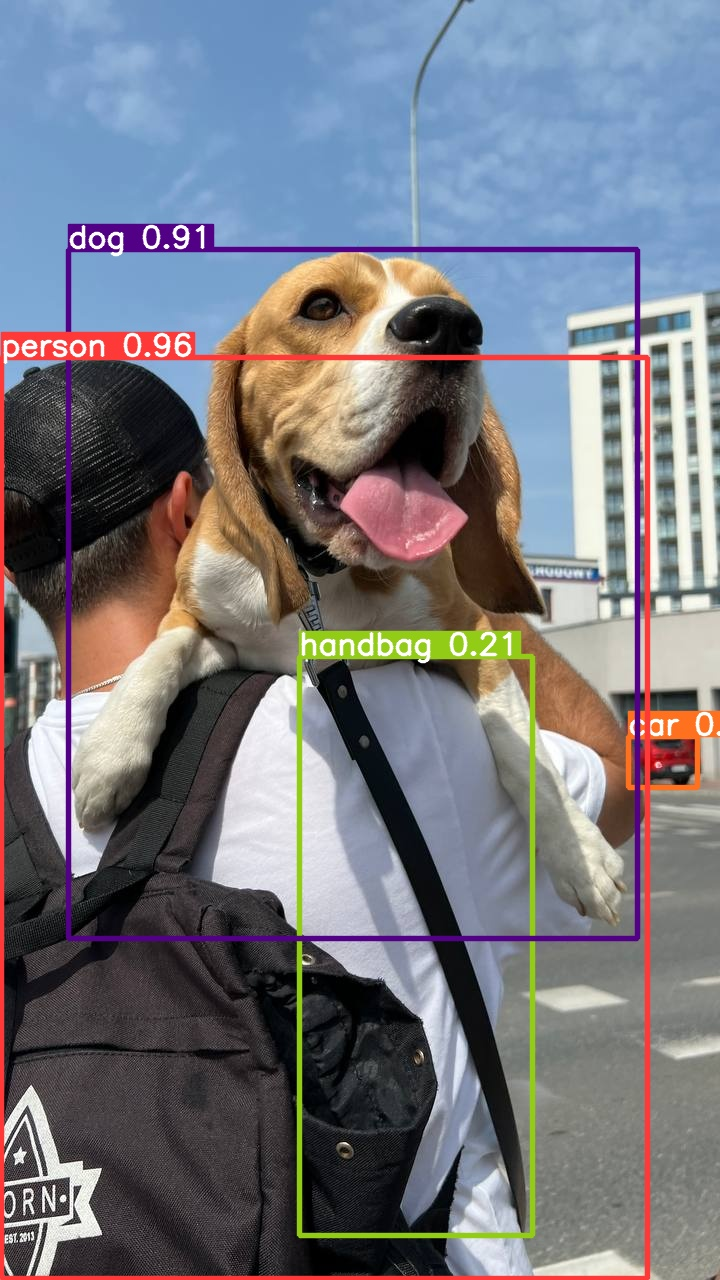

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 268.2ms
Speed: 0.6ms pre-process, 268.2ms inference, 1007.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


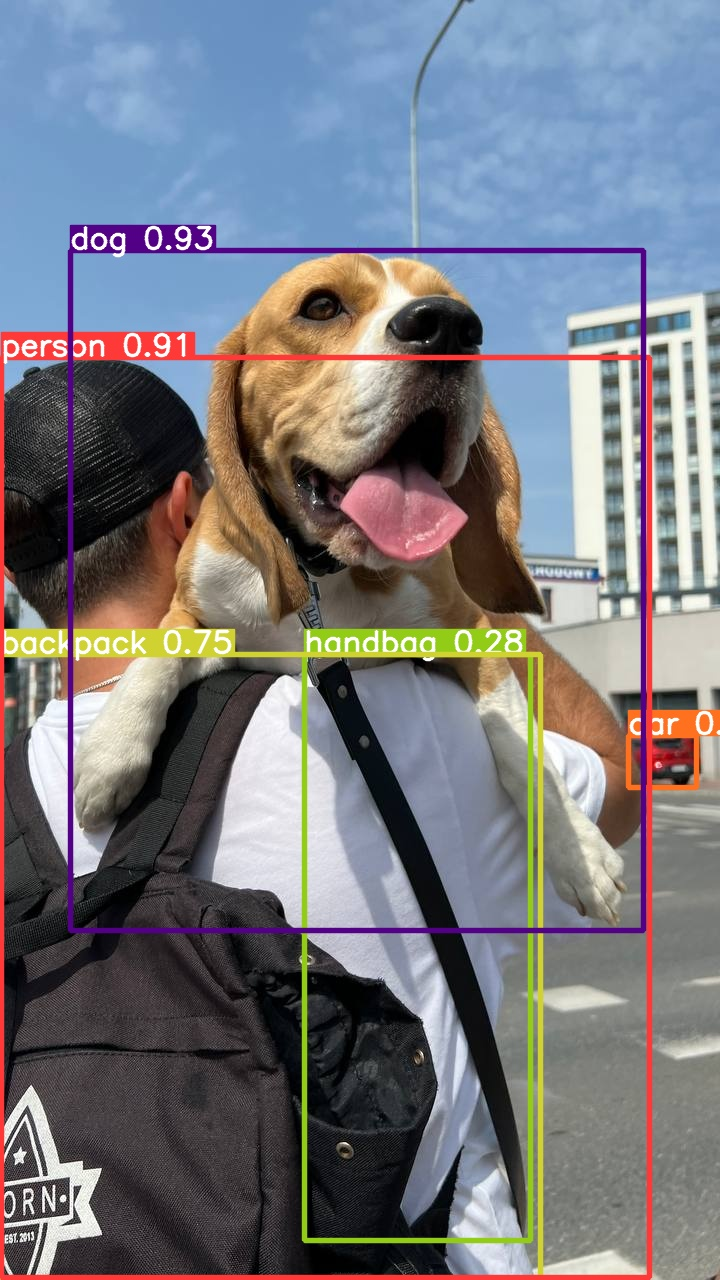

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/yolov9/runs/detect/exp3/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [5]:
%cd {HOME}/yolov9

/content/yolov9


**ПРИМЕЧАНИЕ:** Буду юзать[football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc). Вы можете заменить его своим набором данных в формате YOLO

In [6]:
# import roboflow

# roboflow.login()

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aztA4R5AJOzQsKUw9s7W")
project = rf.workspace("human-dhfre").project("yolov9human")
version = project.version(1)
dataset = version.download("yolov9")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolov9human-1 in yolov9:: 100%|██████████| 1182/1182 [00:00<00:00, 6867.35it/s]


## Train Custom Model

In [ ]:
!python detect.py --weights /content/weights/gelan-c.pt --source /content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg --imgsz 640 --conf 0.1 --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg: 384x640 21 persons, 1 tv, 204.9ms
Speed: 0.6ms pre-process, 204.9ms inference, 699.3ms NMS per image at shape (1, 3, 640, 640)
Results saved

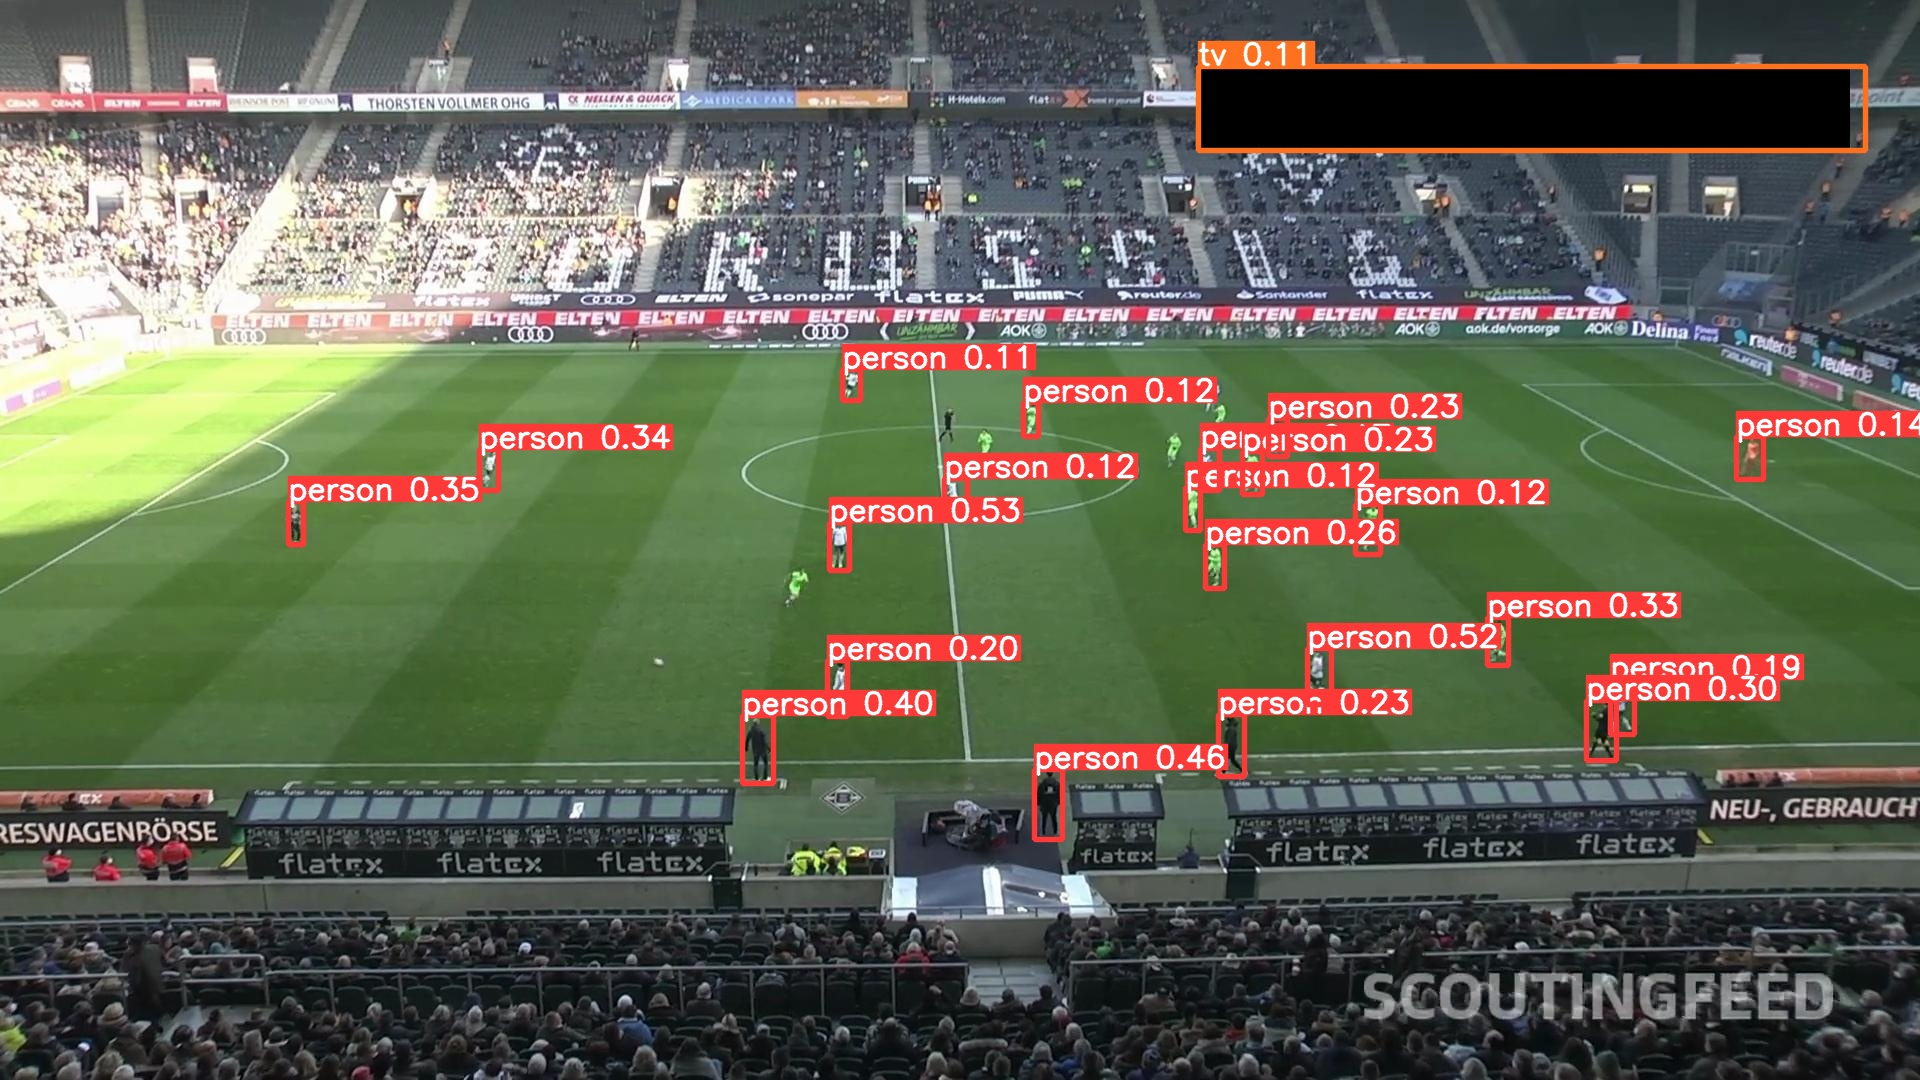

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp6/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg", width=600)

In [7]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-18 12:12:39.261861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 12:12:39.261913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 12:12:39.263908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 12:12:40.915440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/yolov9human-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, 

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [8]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1716034361.291bf6e0f598.1954.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


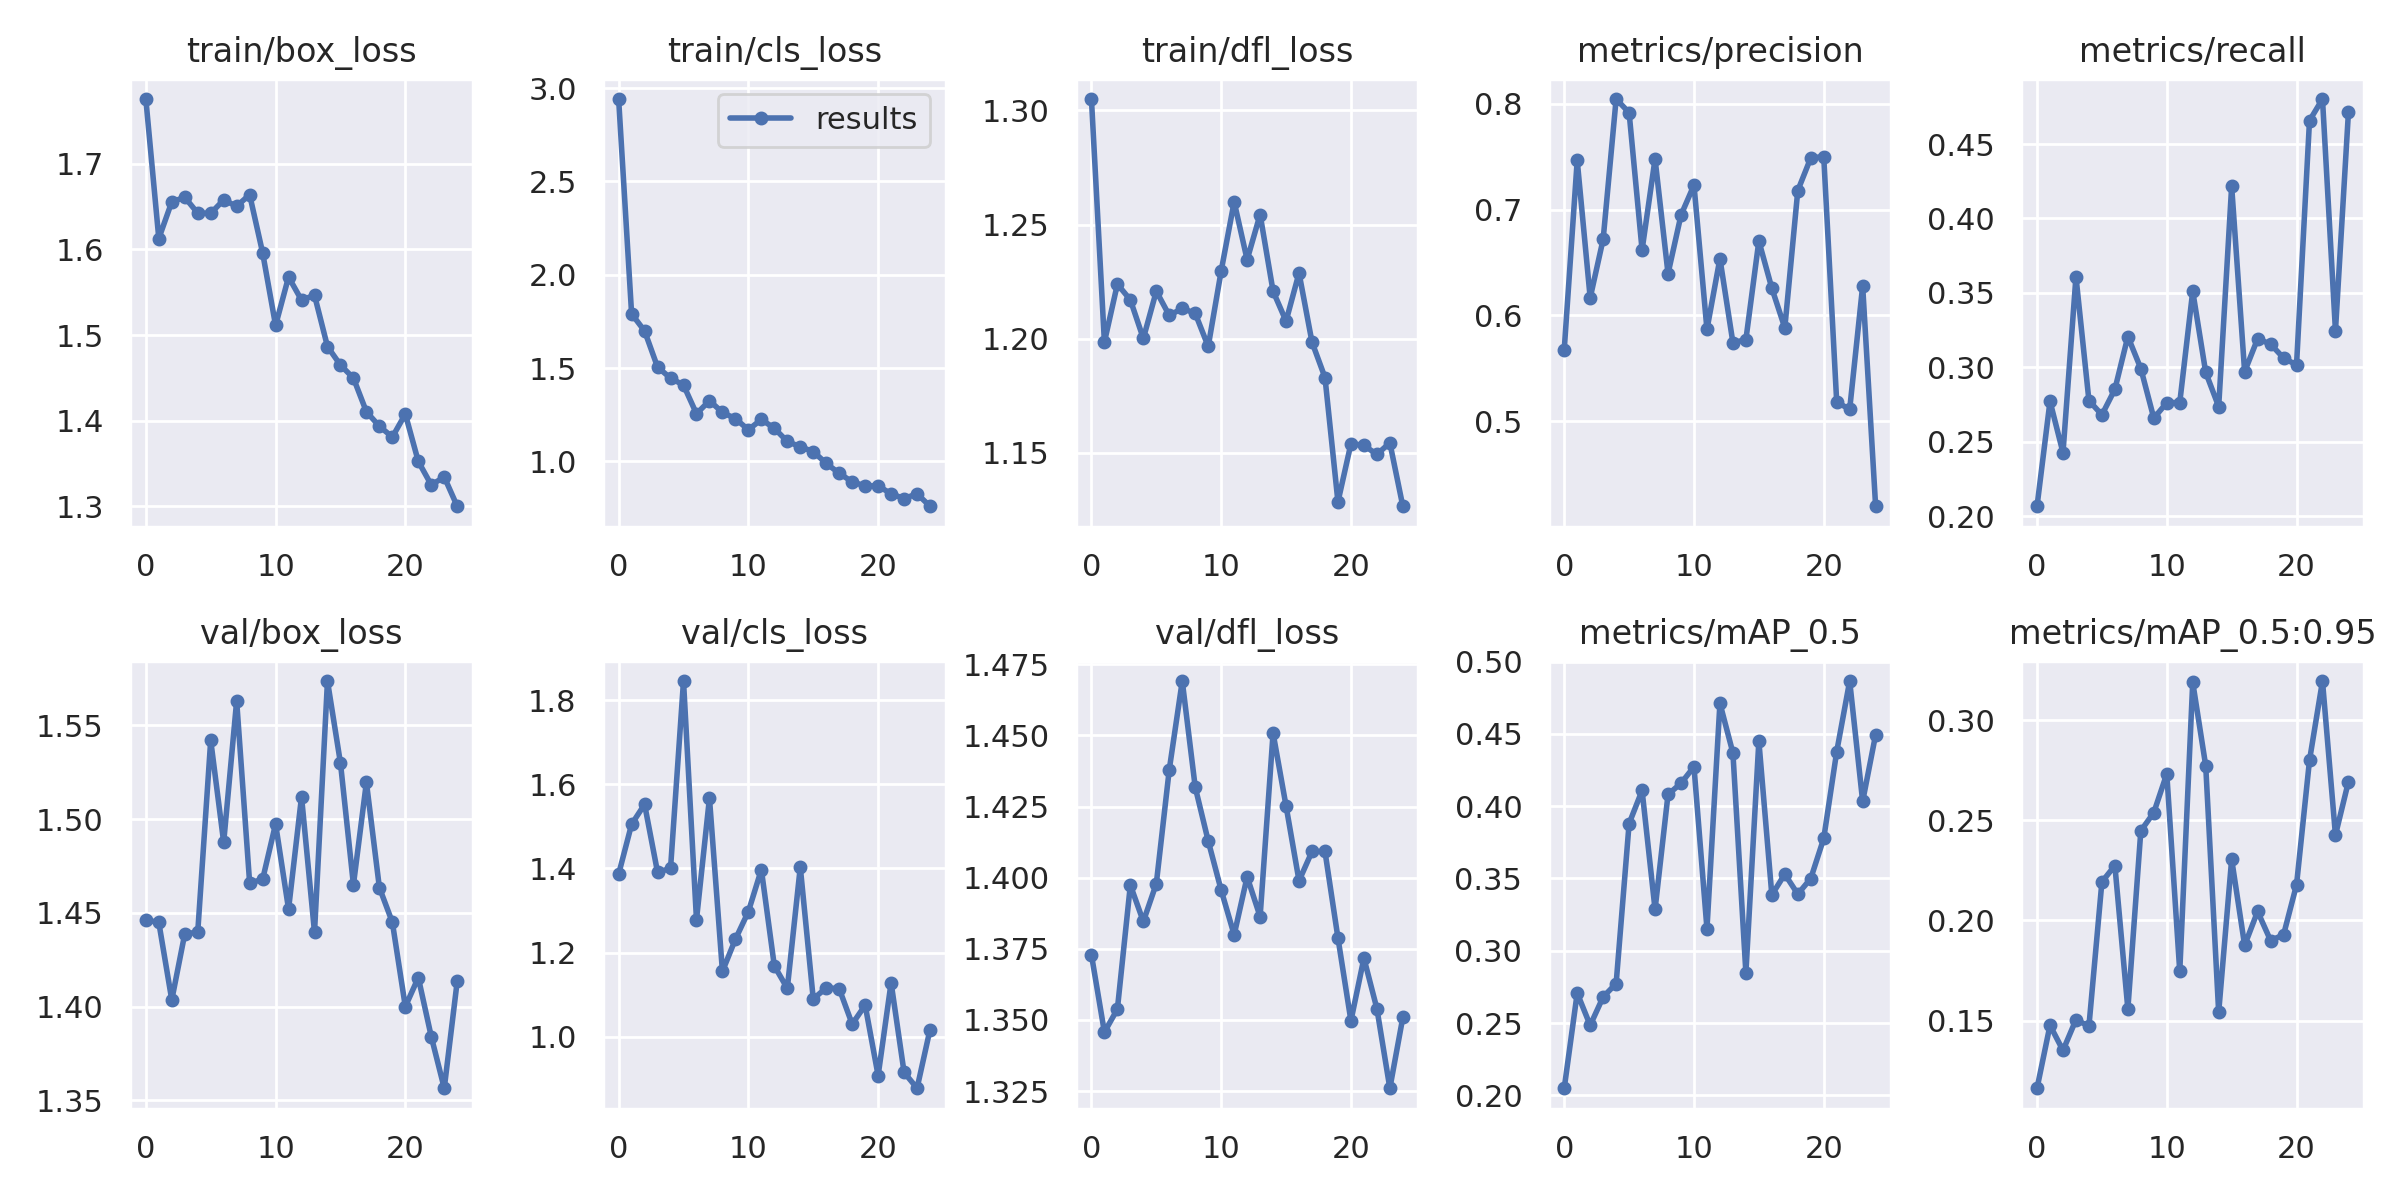

In [9]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

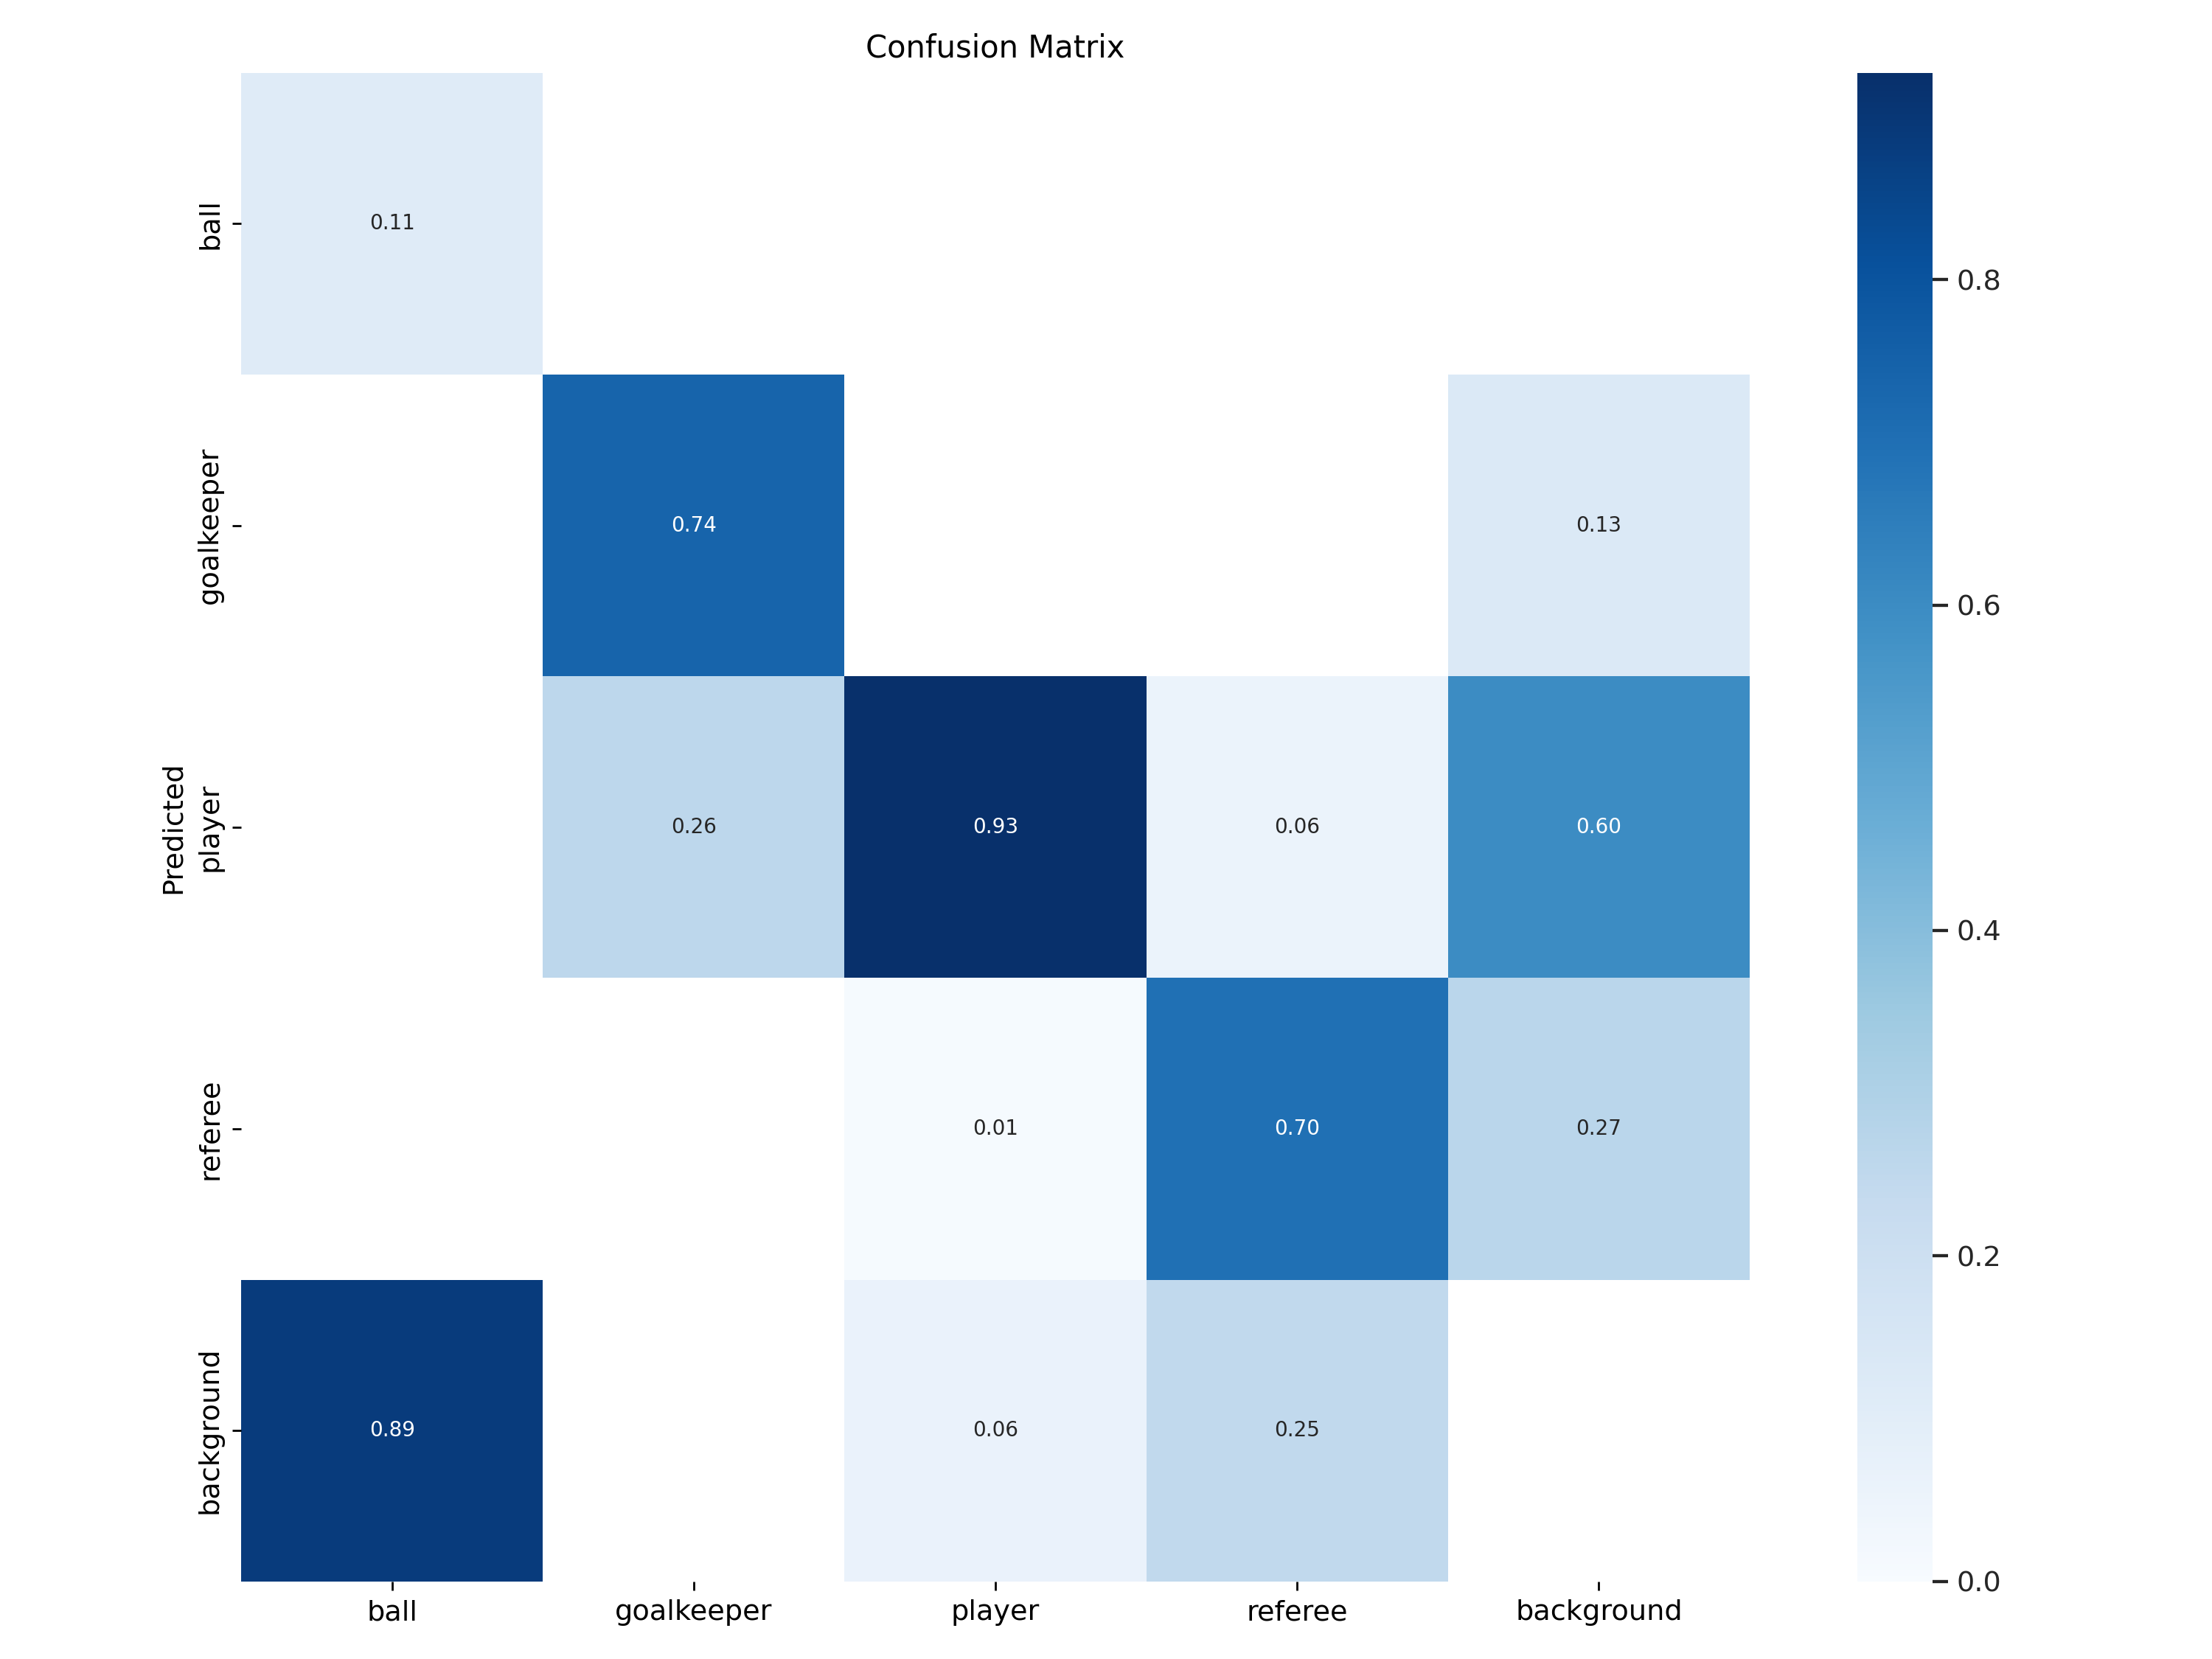

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

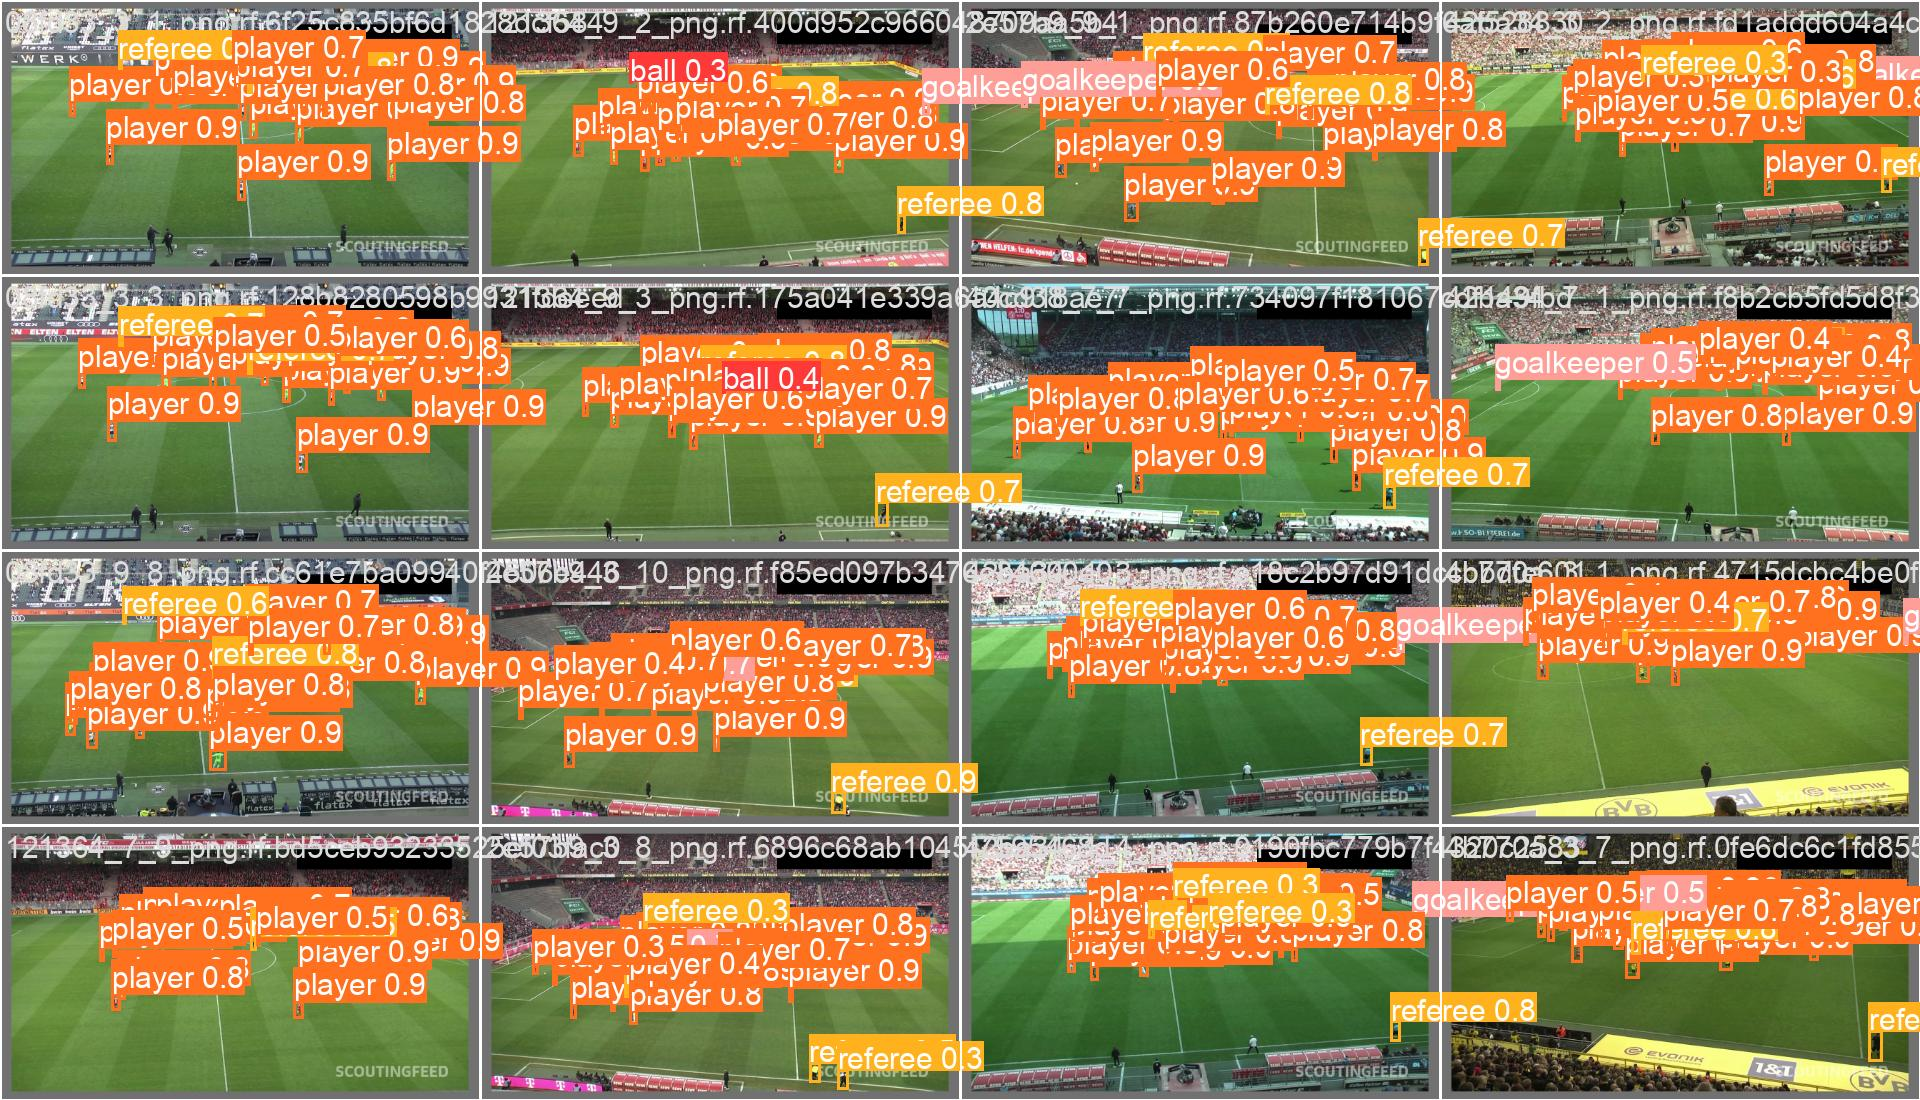

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=4000)

## Validate Custom Model

In [10]:
pwd

'/content/yolov9'

In [11]:
# %cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

val: data=/content/yolov9/yolov9human-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25422525 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/yolov9human-1/valid/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100% 97/97 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances          

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/1 /content/yolov9/football-players-detection-8/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg: 736x1280 1 ball, 22 players, 5 referees, 112.6ms
Speed: 1.0ms pre-process, 112.6ms inference, 480.7ms NMS per image a

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

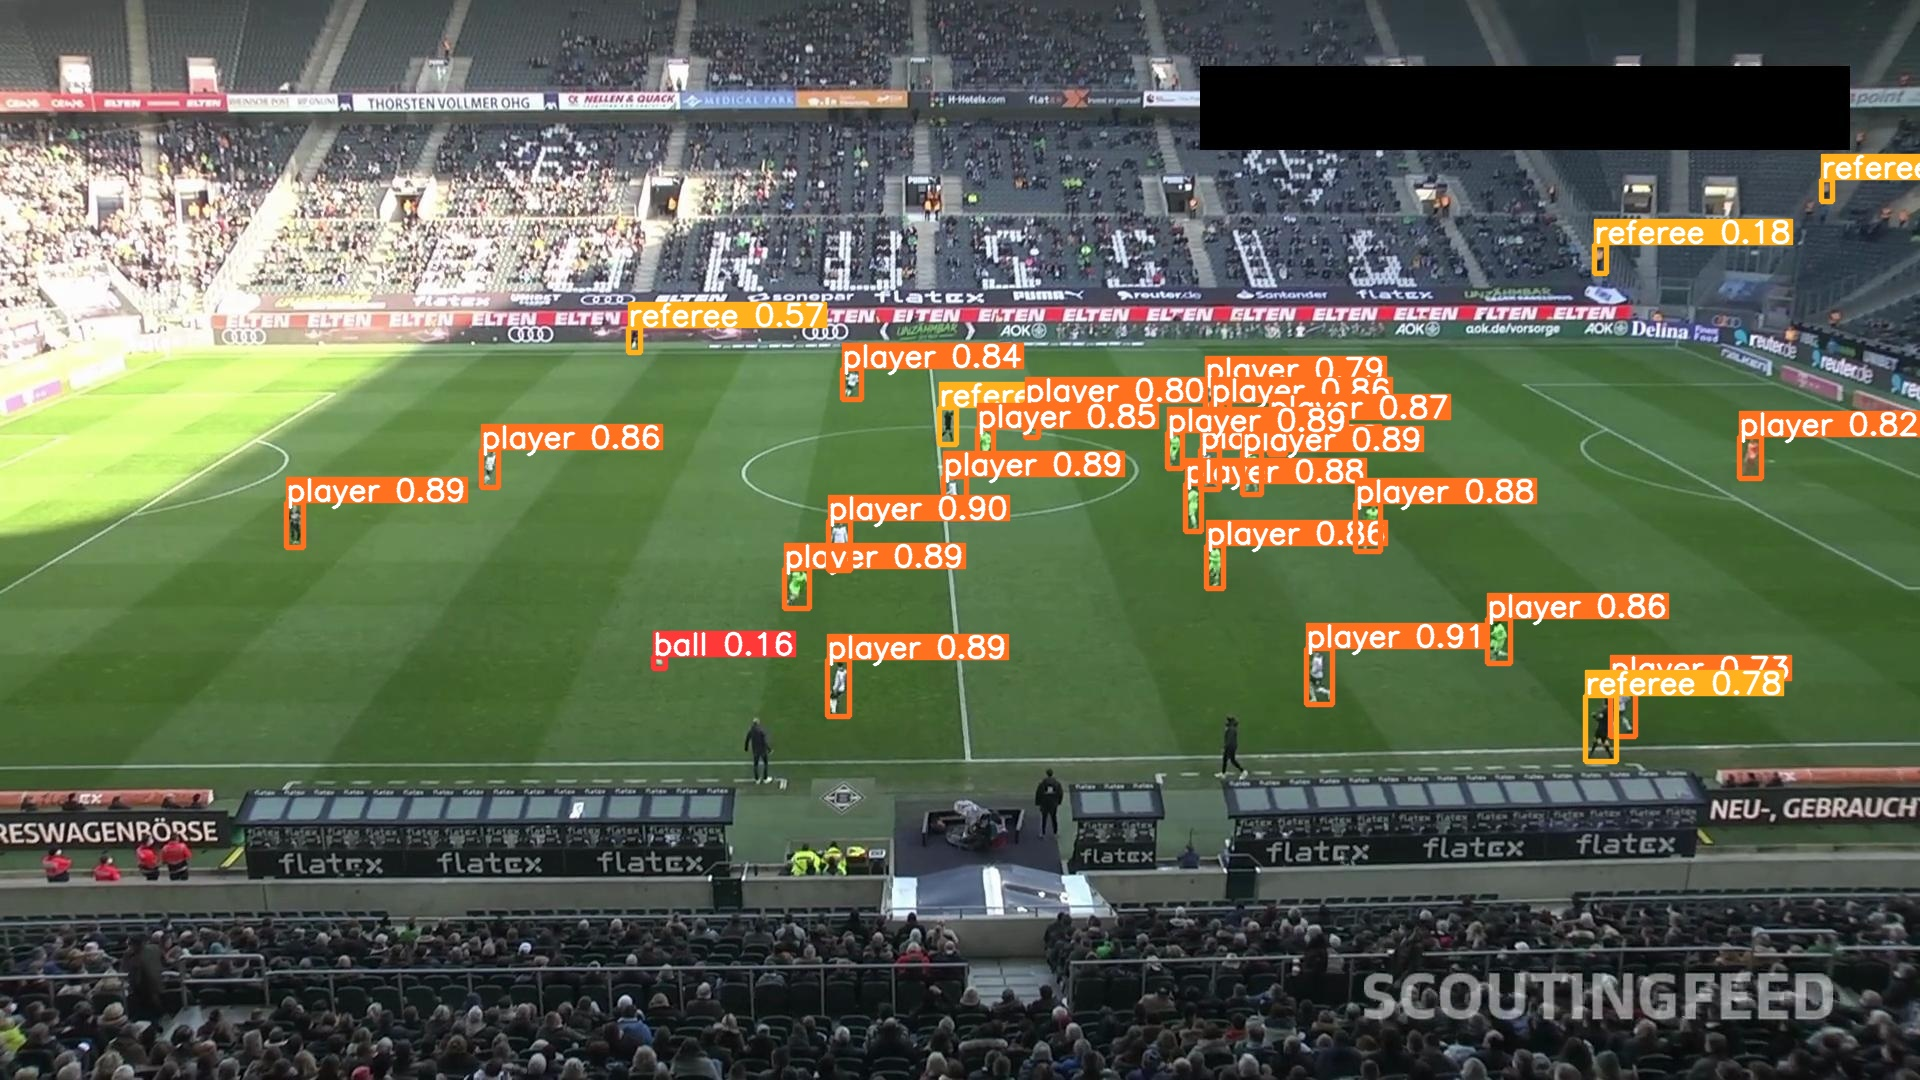

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp5/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))